<a id="1"></a>
# <p style="padding:10px;background-color:#686868;margin:0;color:#c6b9be;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Credit Card Fraud Detection</p>

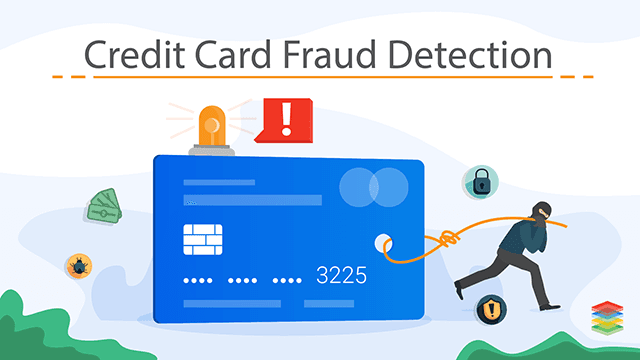

<a id="1"></a>  
# <p style="padding:10px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
from pylab import rcParams
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings(action='ignore')

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Import Dataset</p>

In [2]:
import os
os.getcwd()

'C:\\Users\\dell\\Desktop\\intenship'

In [4]:
df=pd.read_csv(r'creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.describe().T.head(32)

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# distribution of legal transactions & fraud transactions
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# separating the data for analysis
legal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [11]:
print(legal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
legal=legal.sample(n=492)

In [13]:
df=pd.concat([legal,fraud],axis=0)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
179820,124252.0,2.024679,-0.172641,-2.964949,-0.571825,2.601429,3.145535,-0.406214,0.782306,0.358955,...,-0.347462,-1.001180,0.356398,0.605239,-0.267512,0.218813,-0.040729,-0.041387,10.02,0
149468,91290.0,-1.803321,2.430933,-1.198956,-0.752712,0.206027,-0.583367,0.308697,0.447940,2.312638,...,0.100690,0.988701,0.066880,0.622607,-0.495094,-0.271594,1.077591,0.668915,0.89,0
267932,162991.0,1.858084,-1.258118,-0.620105,-0.354329,-1.052454,-0.266426,-0.706993,-0.081113,-0.088370,...,-0.545985,-1.346274,0.427718,0.690149,-0.776197,0.185214,-0.043361,-0.007192,149.00,0
189643,128496.0,2.081055,-0.442351,-0.942202,0.779256,-0.396040,-0.595310,-0.191350,-0.332443,-0.525462,...,-0.239572,0.123577,0.043797,-0.097894,0.278297,-0.459595,0.054341,-0.040707,24.00,0
157896,110591.0,-1.235811,1.956125,0.508907,-0.364766,0.952674,-0.102388,0.511520,-1.744424,0.897805,...,0.983650,-1.778033,-0.060499,0.400244,0.545280,0.358546,0.127838,0.143539,4.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">DATA VISUALIZATION</p> 

In [14]:
df["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [15]:
# statistical measures of the data
legal.Amount.describe()

count     492.000000
mean       84.261098
std       240.302547
min         0.000000
25%         5.217500
50%        23.835000
75%        79.997500
max      3307.140000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

<a id="1"></a>  
### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">Bar Graph</p>  

<Axes: xlabel='Class', ylabel='count'>

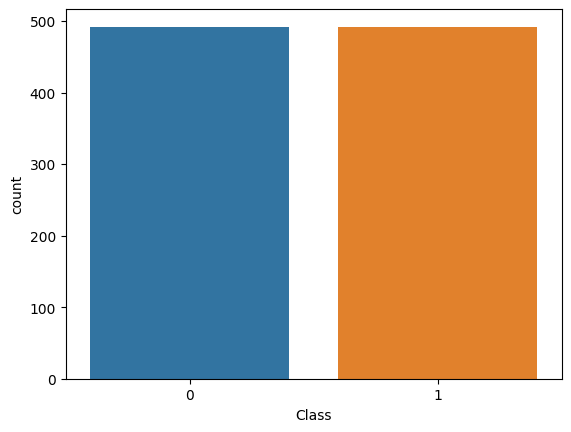

In [17]:
sns.countplot(x= df["Class"])

<a id="1"></a>  
### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">Histogram</p>  

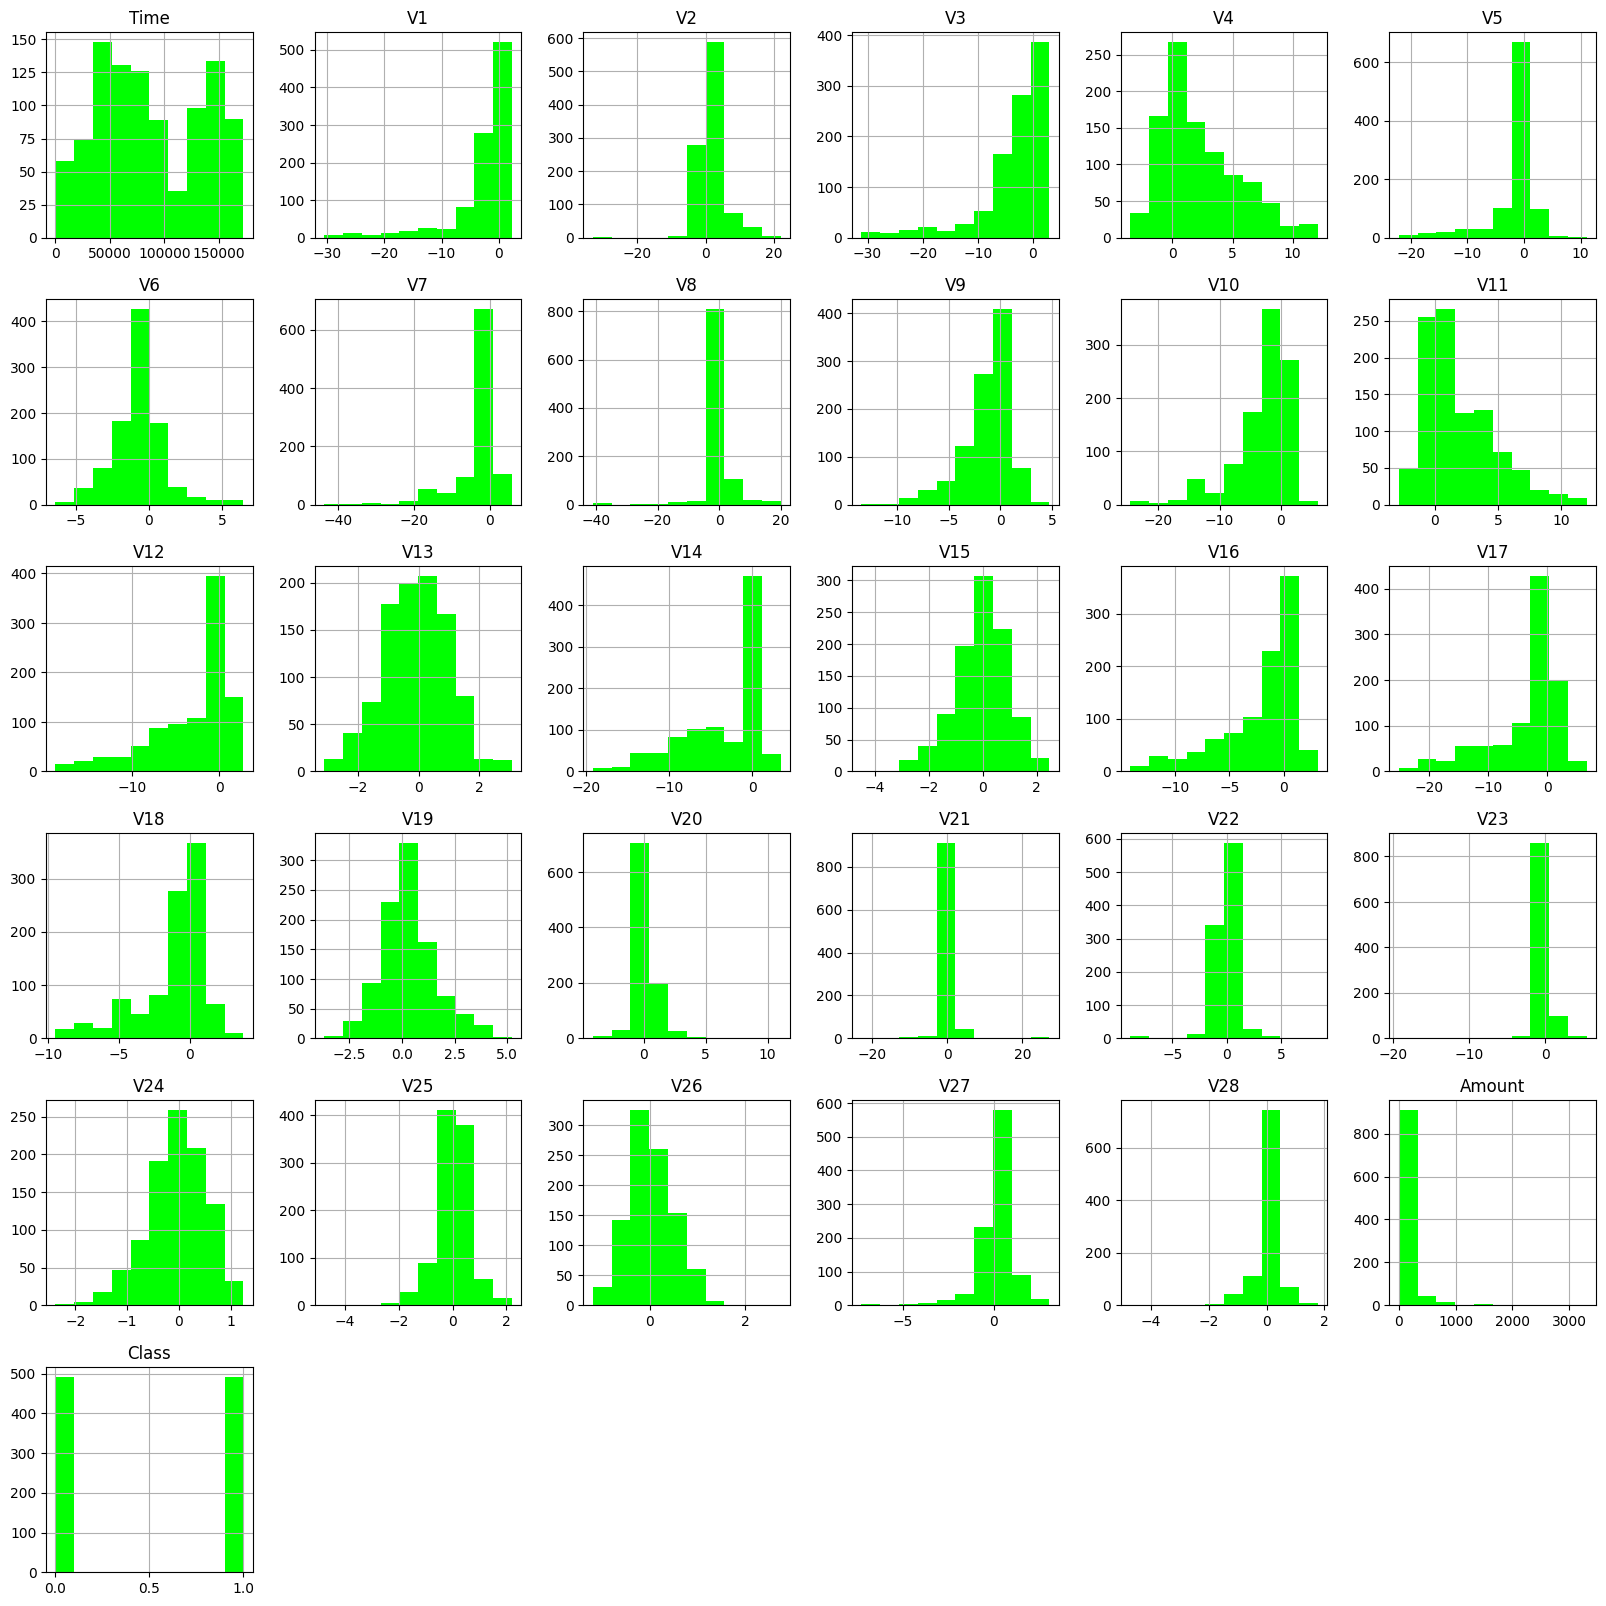

In [18]:
df.hist(figsize=(20,20),color='lime')
plt.show()

<a id="1"></a>  
### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">Scatter Plot</p>  

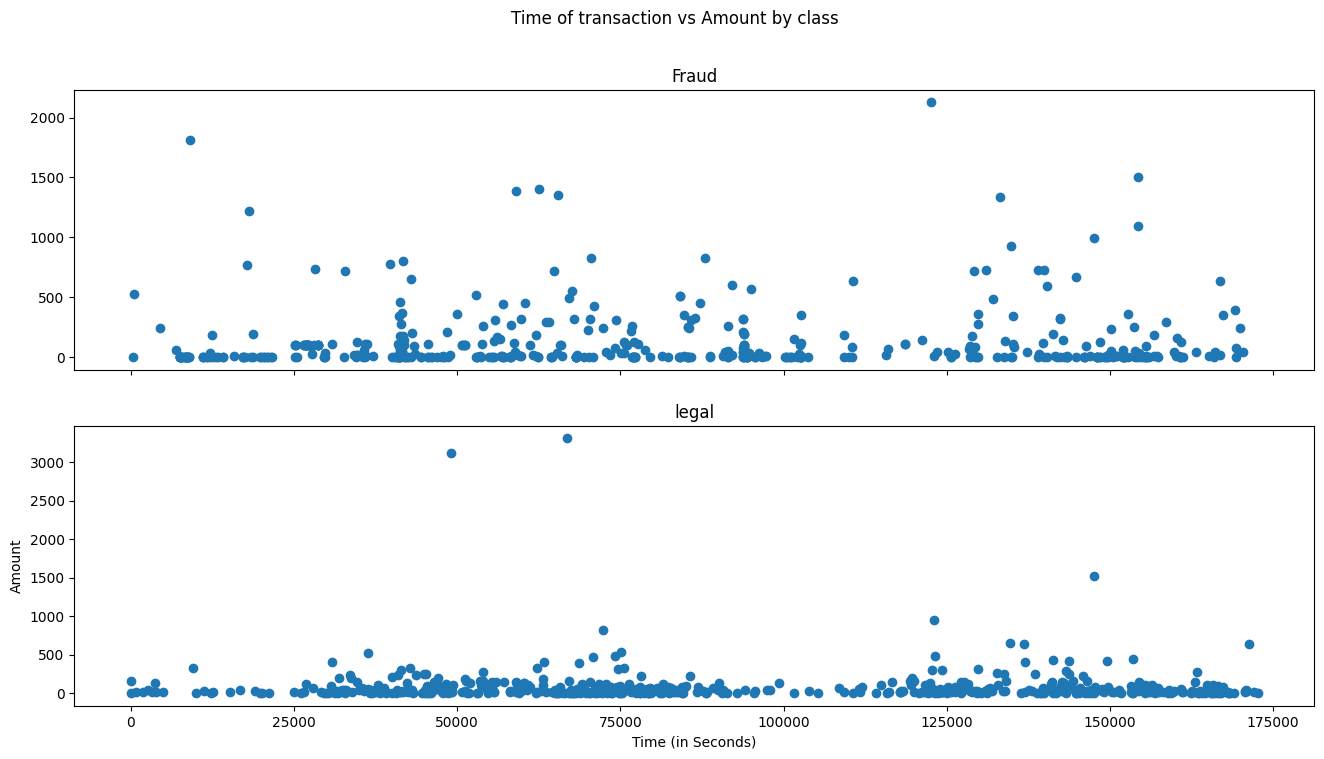

In [19]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legal.Time, legal.Amount)
ax2.set_title('legal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [20]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.253828,-0.215270,0.146772,-0.212875,0.283575,0.108393,0.218763,-0.142320,0.153167,...,-0.057172,0.116572,0.058207,0.001279,-0.191462,-0.074977,-0.133267,0.012063,0.006363,-0.139119
V1,0.253828,1.000000,-0.751206,0.879378,-0.615864,0.867062,0.324811,0.875659,-0.083767,0.663210,...,0.010764,-0.022346,-0.036727,-0.058444,-0.068080,0.057283,0.183873,0.226555,-0.076339,-0.430092
V2,-0.215270,-0.751206,1.000000,-0.820145,0.638514,-0.772067,-0.270459,-0.836654,-0.018249,-0.681744,...,0.034783,0.011684,0.177162,-0.006241,0.119593,-0.016350,-0.171361,0.108274,-0.311357,0.472627
V3,0.146772,0.879378,-0.820145,1.000000,-0.778944,0.855841,0.477475,0.887899,-0.172137,0.767441,...,0.024691,-0.057602,-0.035101,0.033919,-0.080915,-0.011927,0.096039,0.128580,-0.030487,-0.569797
V4,-0.212875,-0.615864,0.638514,-0.778944,1.000000,-0.577298,-0.434828,-0.708987,0.103361,-0.787940,...,-0.018815,0.119553,0.021850,-0.104947,-0.028596,0.124757,0.006086,-0.070829,0.039615,0.708173
V5,0.283575,0.867062,-0.772067,0.855841,-0.577298,1.000000,0.306742,0.849042,-0.211957,0.661380,...,0.044836,-0.092592,-0.094509,-0.127842,-0.094023,0.068827,0.184538,0.153107,-0.093416,-0.369806
V6,0.108393,0.324811,-0.270459,0.477475,-0.434828,0.306742,1.000000,0.276267,-0.584402,0.374466,...,0.023717,0.005021,0.345975,-0.053718,-0.127043,-0.010169,-0.179916,-0.026388,0.105127,-0.400618
V7,0.218763,0.875659,-0.836654,0.887899,-0.708987,0.849042,0.276267,1.000000,0.086317,0.760971,...,0.040900,-0.116281,-0.102488,-0.021880,0.048993,0.024848,0.231800,0.121913,0.124490,-0.478825
V8,-0.142320,-0.083767,-0.018249,-0.172137,0.103361,-0.211957,-0.584402,0.086317,1.000000,-0.076352,...,-0.113259,0.037828,-0.434543,0.071301,0.232268,0.046617,0.294077,-0.003975,0.023607,0.059049
V9,0.153167,0.663210,-0.681744,0.767441,-0.787940,0.661380,0.374466,0.760971,-0.076352,1.000000,...,0.160073,-0.240302,-0.056911,0.047046,-0.001058,-0.116785,0.123865,0.103995,0.006223,-0.556851


<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Building</p> 

## splitting the dataset into train set and test set

In [21]:
X=df.drop(['Class'],axis=1)

In [22]:
y=df['Class']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">LogisticRegression</p>   

In [24]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_train_pred=logreg.predict(X_train)
Train_accuracy = accuracy_score(y_train,y_train_pred)
Test_accuracy=accuracy_score(y_test,y_pred)

print('Train Acc:',Train_accuracy)
print('Test Acc:',Test_accuracy)
print(76*"-")
print(classification_report(y_test,y_pred))

Train Acc: 0.9491279069767442
Test Acc: 0.9459459459459459
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       148
           1       0.96      0.93      0.94       148

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">RandomForestClassifier</p>   

In [25]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred1=RFC.predict(X_test)
y_train_pred1=RFC.predict(X_train)
Train_accuracy1 = accuracy_score(y_train,y_train_pred1)
Test_accuracy1 =accuracy_score(y_test,y_pred1)

print('Train Accuracy:',Train_accuracy1*100)
print('Test Accuracy:',Test_accuracy1*100)
print(76*"-")
print(classification_report(y_test,y_pred1))

Train Accuracy: 100.0
Test Accuracy: 94.25675675675676
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       148
           1       0.98      0.91      0.94       148

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296



<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">DecisionTreeClassifier</p>   

In [26]:
DTC= DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred2=DTC.predict(X_test)
y_train_pred2=DTC.predict(X_train)
Train_accuracy2 = accuracy_score(y_train,y_train_pred2)
Test_accuracy2 =accuracy_score(y_test,y_pred2)

print('Train Accuracy:',Train_accuracy2*100)
print('Test Accuracy:',Test_accuracy2*100)
print(76*"-")
print(classification_report(y_test,y_pred2))

Train Accuracy: 100.0
Test Accuracy: 88.85135135135135
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       148
           1       0.86      0.93      0.89       148

    accuracy                           0.89       296
   macro avg       0.89      0.89      0.89       296
weighted avg       0.89      0.89      0.89       296



<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">SVM</p>   

In [27]:
svm =SVC()
svm.fit(X_train,y_train)
y_pred3=svm.predict(X_test)
y_train_pred3=svm.predict(X_train)
Train_accuracy3 = accuracy_score(y_train,y_train_pred3)
Test_accuracy3 =accuracy_score(y_test,y_pred3)

print('Train Accuracy:',Train_accuracy3*100)
print('Test Accuracy:',Test_accuracy3*100)
print(76*"-")
print(classification_report(y_test,y_pred3))

Train Accuracy: 52.18023255813954
Test Accuracy: 50.67567567567568
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.48      0.49       148
           1       0.51      0.53      0.52       148

    accuracy                           0.51       296
   macro avg       0.51      0.51      0.51       296
weighted avg       0.51      0.51      0.51       296



In [28]:
DF=pd.DataFrame({'Model':('LogisticRegression', 'RandomForestClassifier','DecisionTreeClassifier','SVM'),
                 'Accuracy':(Test_accuracy, Test_accuracy1, Test_accuracy2, Test_accuracy3)})
DF
DF.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,LogisticRegression,0.945946
1,RandomForestClassifier,0.942568
2,DecisionTreeClassifier,0.888514
3,SVM,0.506757


<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Conculsion: - The order of the ✅Best Models from top to bottom:  LogisticRegression </p>  